In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
file_path = "./data/uniswap_v2_pool_count_timeseries.csv"
df = pd.read_csv(file_path)
df

,date,pool_count,currency_pairs
0,2020-05-18,9,"REN/USDC, CHAI/WETH, PAX/USDC, BNT/DAI, DAI/WE..."
1,2020-05-19,9,"REN/USDC, CHAI/WETH, PAX/USDC, BNT/DAI, DAI/WE..."
2,2020-05-20,192,"WBTC/USDC, XOR/WETH, DGX/WETH, renZEC/DAI, WET..."
3,2020-05-21,244,"WBTC/USDC, XOR/WETH, DGX/WETH, FUN/WETH, renZE..."
4,2020-05-22,271,"WBTC/USDC, XOR/WETH, LMY/WETH, DGX/WETH, FUN/W..."
...,...,...,...
1673,2024-12-16,393446,"KABOSU2.0/WETH, SLC/USDT, HORE/WETH, RBot/WETH..."
1674,2024-12-17,393563,"KABOSU2.0/WETH, SLC/USDT, HORE/WETH, RBot/WETH..."
1675,2024-12-18,393686,"KABOSU2.0/WETH, SLC/USDT, HORE/WETH, RBot/WETH..."
1676,2024-12-19,393791,"KABOSU2.0/WETH, SLC/USDT, HORE/WETH, RBot/WETH..."


In [3]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Drop rows with missing pool count data
df = df.dropna(subset=['pool_count'])

<Axes: xlabel='date'>

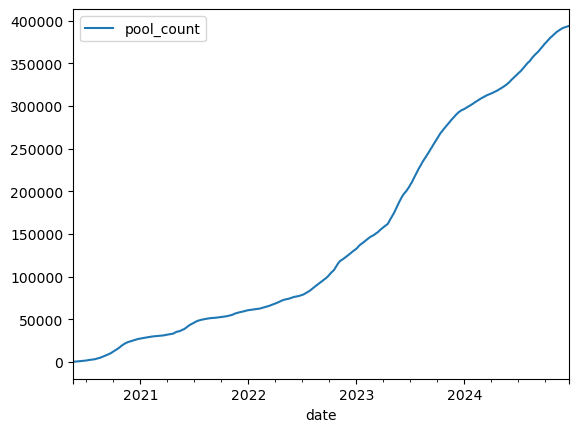

In [4]:
df.plot()

In [5]:
df['daily_pools_created'] = df['pool_count'].diff().fillna(0)

<Axes: xlabel='date'>

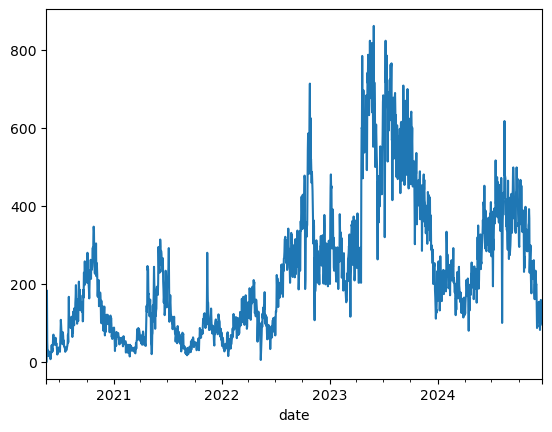

In [6]:
df['daily_pools_created'].plot()

In [7]:
df

,pool_count,currency_pairs,daily_pools_created
date,,,
2020-05-18,9,"REN/USDC, CHAI/WETH, PAX/USDC, BNT/DAI, DAI/WE...",0.0
2020-05-19,9,"REN/USDC, CHAI/WETH, PAX/USDC, BNT/DAI, DAI/WE...",0.0
2020-05-20,192,"WBTC/USDC, XOR/WETH, DGX/WETH, renZEC/DAI, WET...",183.0
2020-05-21,244,"WBTC/USDC, XOR/WETH, DGX/WETH, FUN/WETH, renZE...",52.0
2020-05-22,271,"WBTC/USDC, XOR/WETH, LMY/WETH, DGX/WETH, FUN/W...",27.0
...,...,...,...
2024-12-16,393446,"KABOSU2.0/WETH, SLC/USDT, HORE/WETH, RBot/WETH...",117.0
2024-12-17,393563,"KABOSU2.0/WETH, SLC/USDT, HORE/WETH, RBot/WETH...",117.0
2024-12-18,393686,"KABOSU2.0/WETH, SLC/USDT, HORE/WETH, RBot/WETH...",123.0


In [8]:
# Read the volatility CSV
volatility_df = pd.read_csv('./data/crypto_volatility.csv', parse_dates=['open_time'], index_col='open_time')

# Rename index to match `df`'s date column for clarity
volatility_df.index.name = 'date'
volatility_df.index = volatility_df.index.normalize()  # Removes time, keeping only the date

volatility_df

,volatility_BTC,volatility_ETH
date,,
2020-05-18,0.663055,0.651359
2020-05-19,0.657939,0.637882
2020-05-20,0.649254,0.617111
2020-05-21,0.670603,0.642146
2020-05-22,0.664072,0.623359
...,...,...
2024-12-16,0.354784,0.587723
2024-12-17,0.352771,0.589994
2024-12-18,0.395418,0.621038


In [9]:
# Merge the two dataframes on the index
combined_df = df.join(volatility_df, how='inner')
combined_df

,pool_count,currency_pairs,daily_pools_created,volatility_BTC,volatility_ETH
date,,,,,
2020-05-18,9,"REN/USDC, CHAI/WETH, PAX/USDC, BNT/DAI, DAI/WE...",0.0,0.663055,0.651359
2020-05-19,9,"REN/USDC, CHAI/WETH, PAX/USDC, BNT/DAI, DAI/WE...",0.0,0.657939,0.637882
2020-05-20,192,"WBTC/USDC, XOR/WETH, DGX/WETH, renZEC/DAI, WET...",183.0,0.649254,0.617111
2020-05-21,244,"WBTC/USDC, XOR/WETH, DGX/WETH, FUN/WETH, renZE...",52.0,0.670603,0.642146
2020-05-22,271,"WBTC/USDC, XOR/WETH, LMY/WETH, DGX/WETH, FUN/W...",27.0,0.664072,0.623359
...,...,...,...,...,...
2024-12-16,393446,"KABOSU2.0/WETH, SLC/USDT, HORE/WETH, RBot/WETH...",117.0,0.354784,0.587723
2024-12-17,393563,"KABOSU2.0/WETH, SLC/USDT, HORE/WETH, RBot/WETH...",117.0,0.352771,0.589994
2024-12-18,393686,"KABOSU2.0/WETH, SLC/USDT, HORE/WETH, RBot/WETH...",123.0,0.395418,0.621038


In [10]:
# Split the data into in-sample and out-of-sample (using a specific date)
split_date = '2023-01-01'

# In-sample data (up to split_date)
in_sample_df = combined_df.loc[:split_date]

# Out-of-sample data (after split_date)
out_sample_df = combined_df.loc[split_date:]

In [11]:
# Prepare in-sample data (X and y for both)
y_in = in_sample_df['daily_pools_created']
X_in_1 = in_sample_df['volatility_BTC']
X_in_2 = in_sample_df['volatility_ETH']
X_in_combined = in_sample_df[['volatility_BTC', 'volatility_ETH']]

In [12]:
# Fit the models on in-sample data

# Model 1: BTC volatility
X_in_1_model = sm.add_constant(X_in_1)  # Add constant for intercept
model1_in = sm.OLS(y_in, X_in_1_model).fit()

# Model 2: ETH volatility
X_in_2_model = sm.add_constant(X_in_2)  # Add constant for intercept
model2_in = sm.OLS(y_in, X_in_2_model).fit()

# Model 3: BTC + ETH volatility
X_in_combined_model = sm.add_constant(X_in_combined)
model3_in = sm.OLS(y_in, X_in_combined_model).fit()

In [13]:
# Prepare out-of-sample data for predictions
y_out = out_sample_df['daily_pools_created']
X_out_1 = out_sample_df['volatility_BTC']
X_out_2 = out_sample_df['volatility_ETH']
X_out_combined = out_sample_df[['volatility_BTC', 'volatility_ETH']]

# Add constant for prediction
X_out_1_model = sm.add_constant(X_out_1)
X_out_2_model = sm.add_constant(X_out_2)
X_out_combined_model = sm.add_constant(X_out_combined)

# Make predictions using the fitted models
predictions1 = model1_in.predict(X_out_1_model)
predictions2 = model2_in.predict(X_out_2_model)
predictions3 = model3_in.predict(X_out_combined_model)

In [14]:
# Calculate the errors (MAE, MSE, RMSE)
mae1 = mean_absolute_error(y_out, predictions1)
mae2 = mean_absolute_error(y_out, predictions2)
mae3 = mean_absolute_error(y_out, predictions3)

mse1 = mean_squared_error(y_out, predictions1)
mse2 = mean_squared_error(y_out, predictions2)
mse3 = mean_squared_error(y_out, predictions3)

rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)

# Print the results
print(f"Model 1 (BTC volatility) MAE: {mae1:.4f}, MSE: {mse1:.4f}, RMSE: {rmse1:.4f}")
print(f"Model 2 (ETH volatility) MAE: {mae2:.4f}, MSE: {mse2:.4f}, RMSE: {rmse2:.4f}")
print(f"Model 3 (BTC + ETH volatility) MAE: {mae3:.4f}, MSE: {mse3:.4f}, RMSE: {rmse3:.4f}")

Model 1 (BTC volatility) MAE: 200.7371, MSE: 64338.9546, RMSE: 253.6512
Model 2 (ETH volatility) MAE: 222.9971, MSE: 76805.8527, RMSE: 277.1387
Model 3 (BTC + ETH volatility) MAE: 226.4902, MSE: 75883.1303, RMSE: 275.4689


Model 1 (BTC volatility) outperforms both Model 2 (ETH volatility) and Model 3 (BTC + ETH volatility) in predicting the number of Uniswap v2 pools, as indicated by its lower error metrics in the out-of-sample data.

In [15]:
print(model1_in.summary())

                             OLS Regression Results                            
Dep. Variable:     daily_pools_created   R-squared:                       0.071
Model:                             OLS   Adj. R-squared:                  0.070
Method:                  Least Squares   F-statistic:                     73.13
Date:                 Mon, 23 Dec 2024   Prob (F-statistic):           4.77e-17
Time:                         14:16:10   Log-Likelihood:                -5802.5
No. Observations:                  959   AIC:                         1.161e+04
Df Residuals:                      957   BIC:                         1.162e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            232.2272     11.4

In [16]:
print(model2_in.summary())

                             OLS Regression Results                            
Dep. Variable:     daily_pools_created   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.062
Date:                 Mon, 23 Dec 2024   Prob (F-statistic):              0.303
Time:                         14:16:10   Log-Likelihood:                -5837.3
No. Observations:                  959   AIC:                         1.168e+04
Df Residuals:                      957   BIC:                         1.169e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            149.2818     11.2

In [17]:
print(model3_in.summary())

                             OLS Regression Results                            
Dep. Variable:     daily_pools_created   R-squared:                       0.181
Model:                             OLS   Adj. R-squared:                  0.179
Method:                  Least Squares   F-statistic:                     105.6
Date:                 Mon, 23 Dec 2024   Prob (F-statistic):           3.68e-42
Time:                         14:16:10   Log-Likelihood:                -5742.1
No. Observations:                  959   AIC:                         1.149e+04
Df Residuals:                      956   BIC:                         1.150e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            208.5491     10.9

In [18]:
# Function to count distinct cryptocurrencies
def count_distinct_cryptos(currency_pairs):
    # Split the pairs and create a set to get unique cryptocurrencies
    cryptos = set()
    pairs = currency_pairs.split(', ')
    for pair in pairs:
        crypto1, crypto2 = pair.split('/', 1)
        cryptos.add(crypto1)
        cryptos.add(crypto2)
    return len(cryptos)

# Apply the function and add a new column for distinct cryptocurrency count
combined_df['distinct_crypto_count'] = combined_df['currency_pairs'].apply(count_distinct_cryptos)

print(combined_df[['daily_pools_created', 'distinct_crypto_count']])

            daily_pools_created  distinct_crypto_count
date                                                  
2020-05-18                  0.0                      9
2020-05-19                  0.0                      9
2020-05-20                183.0                    143
2020-05-21                 52.0                    183
2020-05-22                 27.0                    210
...                         ...                    ...
2024-12-16                117.0                    992
2024-12-17                117.0                    992
2024-12-18                123.0                    992
2024-12-19                105.0                    992
2024-12-20                 96.0                    992

[1678 rows x 2 columns]


In [19]:
# In-sample data (up to split_date)
in_sample_df = combined_df.loc[:split_date]

# Out-of-sample data (after split_date)
out_sample_df = combined_df.loc[split_date:]

# Prepare in-sample data (X and y)
y_in = in_sample_df['daily_pools_created']
X_in = in_sample_df['distinct_crypto_count']

# Add constant for the intercept
X_in_model = sm.add_constant(X_in)

# Fit the model on in-sample data
model4_in = sm.OLS(y_in, X_in_model).fit()

# Prepare out-of-sample data for predictions
y_out = out_sample_df['daily_pools_created']
X_out = out_sample_df['distinct_crypto_count']

# Add constant for prediction
X_out_model = sm.add_constant(X_out)

# Make predictions using the fitted model
predictions4 = model4_in.predict(X_out_model)

# Calculate the errors (MAE, MSE, RMSE)
mae4 = mean_absolute_error(y_out, predictions4)
mse4 = mean_squared_error(y_out, predictions4)
rmse4 = np.sqrt(mse4)

print(model4_in.summary())
# Print the results for Model 4
print(f"Model 4 (distinct_crypto_count) MAE: {mae4:.4f}, MSE: {mse4:.4f}, RMSE: {rmse4:.4f}")

                             OLS Regression Results                            
Dep. Variable:     daily_pools_created   R-squared:                       0.046
Model:                             OLS   Adj. R-squared:                  0.045
Method:                  Least Squares   F-statistic:                     45.65
Date:                 Mon, 23 Dec 2024   Prob (F-statistic):           2.45e-11
Time:                         14:16:10   Log-Likelihood:                -5815.4
No. Observations:                  959   AIC:                         1.163e+04
Df Residuals:                      957   BIC:                         1.164e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [20]:
# List of target cryptocurrencies
target_cryptos = {'WBTC', 'WETH', 'USDC', 'USDT', 'DAI'}

# Function to count distinct pairs involving target cryptocurrencies
def count_distinct_pairs_with_targets(currency_pairs):
    # Create a set to store unique pairs involving target cryptocurrencies
    direct_pairs_set = set()
    
    # Split the input string by ", "
    pairs = currency_pairs.split(', ')
    
    for pair in pairs:
        # Split each pair into two currencies
        crypto1, crypto2 = pair.split('/', 1)
        
        # Check if either cryptocurrency is in the target list
        if crypto1 in target_cryptos or crypto2 in target_cryptos:
            direct_pairs_set.add(pair)  # Add the pair to the set
    
    # Return the number of unique pairs
    return len(direct_pairs_set)

# Apply the function to the dataframe
combined_df['direct_pairs'] = combined_df['currency_pairs'].apply(count_distinct_pairs_with_targets)

# Display the updated dataframe with only the relevant columns
print(combined_df[['daily_pools_created', 'direct_pairs']])

            daily_pools_created  direct_pairs
date                                         
2020-05-18                  0.0             9
2020-05-19                  0.0             9
2020-05-20                183.0           171
2020-05-21                 52.0           222
2020-05-22                 27.0           247
...                         ...           ...
2024-12-16                117.0           970
2024-12-17                117.0           970
2024-12-18                123.0           970
2024-12-19                105.0           970
2024-12-20                 96.0           970

[1678 rows x 2 columns]


In [21]:
# In-sample data (up to split_date)
in_sample_df = combined_df.loc[:split_date]

# Out-of-sample data (after split_date)
out_sample_df = combined_df.loc[split_date:]

# Now you can proceed with Model 5 as before:
# Prepare in-sample data (X and y) for Model 5
y_in = in_sample_df['daily_pools_created']
X_in = in_sample_df['direct_pairs']

# Add constant for the intercept
X_in_model = sm.add_constant(X_in)

# Fit the model on in-sample data for Model 5
model5_in = sm.OLS(y_in, X_in_model).fit()

# Prepare out-of-sample data for predictions for Model 5
y_out = out_sample_df['daily_pools_created']
X_out = out_sample_df['direct_pairs']

# Add constant for prediction
X_out_model = sm.add_constant(X_out)

# Make predictions using the fitted model for Model 5
predictions5 = model5_in.predict(X_out_model)

# Calculate the errors (MAE, MSE, RMSE) for Model 5
mae5 = mean_absolute_error(y_out, predictions5)
mse5 = mean_squared_error(y_out, predictions5)
rmse5 = np.sqrt(mse5)

print(model5_in.summary())
# Print the results for Model 5
print(f"Model 5 (direct_pairs) MAE: {mae5:.4f}, MSE: {mse5:.4f}, RMSE: {rmse5:.4f}")

                             OLS Regression Results                            
Dep. Variable:     daily_pools_created   R-squared:                       0.066
Model:                             OLS   Adj. R-squared:                  0.065
Method:                  Least Squares   F-statistic:                     68.14
Date:                 Mon, 23 Dec 2024   Prob (F-statistic):           5.01e-16
Time:                         14:16:11   Log-Likelihood:                -5804.8
No. Observations:                  959   AIC:                         1.161e+04
Df Residuals:                      957   BIC:                         1.162e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -123.7351     31.910    

In [22]:
# Function to count distinct pairs involving only USDT
def count_distinct_pairs_with_usdt(currency_pairs):
    # Create a set to store unique pairs involving USDT
    usdt_pairs_set = set()
    
    # Split the input string by ", "
    pairs = currency_pairs.split(', ')
    
    for pair in pairs:
        # Split each pair into two cryptocurrencies
        crypto1, crypto2 = pair.split('/', 1)
        
        # Check if one of the cryptocurrencies is USDT
        if crypto1 == 'USDT' or crypto2 == 'USDT':
            usdt_pairs_set.add(pair)  # Add the pair to the set
    
    # Return the number of unique pairs involving USDT
    return len(usdt_pairs_set)

# Apply the function to the dataframe
combined_df['usdt_pairs'] = combined_df['currency_pairs'].apply(count_distinct_pairs_with_usdt)

# Display the updated dataframe with only the relevant columns
print(combined_df[['daily_pools_created', 'usdt_pairs']])

            daily_pools_created  usdt_pairs
date                                       
2020-05-18                  0.0           0
2020-05-19                  0.0           0
2020-05-20                183.0           5
2020-05-21                 52.0           6
2020-05-22                 27.0           6
...                         ...         ...
2024-12-16                117.0           8
2024-12-17                117.0           8
2024-12-18                123.0           8
2024-12-19                105.0           8
2024-12-20                 96.0           8

[1678 rows x 2 columns]


In [23]:
# Split the data into in-sample and out-of-sample
in_sample_df = combined_df.loc[:split_date]
out_sample_df = combined_df.loc[split_date:]

# Prepare in-sample data (X and y)
y_in = in_sample_df['daily_pools_created']
X_in = in_sample_df['usdt_pairs']

# Add a constant for the intercept
X_in_model = sm.add_constant(X_in)

# Fit the model on in-sample data
model6_in = sm.OLS(y_in, X_in_model).fit()

# Prepare out-of-sample data for predictions
y_out = out_sample_df['daily_pools_created']
X_out = out_sample_df['usdt_pairs']

# Add a constant for prediction
X_out_model = sm.add_constant(X_out)

# Make predictions using the fitted model
predictions6 = model6_in.predict(X_out_model)

# Calculate the errors (MAE, MSE, RMSE)
mae6 = mean_absolute_error(y_out, predictions6)
mse6 = mean_squared_error(y_out, predictions6)
rmse6 = np.sqrt(mse6)

# Print the regression results and error metrics
print(f"Model 6 (usdt_pairs) Summary:")
print(model6_in.summary())
print(f"Model 6 MAE: {mae6:.4f}, MSE: {mse6:.4f}, RMSE: {rmse6:.4f}")

Model 6 (usdt_pairs) Summary:
                             OLS Regression Results                            
Dep. Variable:     daily_pools_created   R-squared:                       0.148
Model:                             OLS   Adj. R-squared:                  0.147
Method:                  Least Squares   F-statistic:                     166.3
Date:                 Mon, 23 Dec 2024   Prob (F-statistic):           3.30e-35
Time:                         14:16:11   Log-Likelihood:                -5760.9
No. Observations:                  959   AIC:                         1.153e+04
Df Residuals:                      957   BIC:                         1.154e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [24]:
# Function to count distinct pairs involving only DAI
def count_distinct_pairs_with_dai(currency_pairs):
    # Create a set to store unique pairs involving DAI
    dai_pairs_set = set()
    
    # Split the input string by ", "
    pairs = currency_pairs.split(', ')
    
    for pair in pairs:
        # Split each pair into two cryptocurrencies
        crypto1, crypto2 = pair.split('/', 1)
        
        # Check if one of the cryptocurrencies is DAI
        if crypto1 == 'DAI' or crypto2 == 'DAI':
            dai_pairs_set.add(pair)  # Add the pair to the set
    
    # Return the number of unique pairs involving DAI
    return len(dai_pairs_set)

# Apply the function to the dataframe
combined_df['dai_pairs'] = combined_df['currency_pairs'].apply(count_distinct_pairs_with_dai)

# Display the updated dataframe with relevant columns
print(combined_df[['daily_pools_created', 'usdt_pairs', 'dai_pairs']])

            daily_pools_created  usdt_pairs  dai_pairs
date                                                  
2020-05-18                  0.0           0          3
2020-05-19                  0.0           0          3
2020-05-20                183.0           5         26
2020-05-21                 52.0           6         36
2020-05-22                 27.0           6         39
...                         ...         ...        ...
2024-12-16                117.0           8          4
2024-12-17                117.0           8          4
2024-12-18                123.0           8          4
2024-12-19                105.0           8          4
2024-12-20                 96.0           8          4

[1678 rows x 3 columns]


In [25]:
# Split the data into in-sample and out-of-sample
in_sample_df = combined_df.loc[:split_date]
out_sample_df = combined_df.loc[split_date:]

# Prepare in-sample data (X and y)
X_in = in_sample_df[['usdt_pairs', 'dai_pairs']]
y_in = in_sample_df['daily_pools_created']

# Add a constant for the intercept
X_in_model7 = sm.add_constant(X_in)

# Fit the model on in-sample data
model7_in = sm.OLS(y_in, X_in_model7).fit()

# Prepare out-of-sample data for predictions
X_out = out_sample_df[['usdt_pairs', 'dai_pairs']]
y_out = out_sample_df['daily_pools_created']

# Add a constant for prediction
X_out_model7 = sm.add_constant(X_out)

# Make predictions using the fitted model
predictions7 = model7_in.predict(X_out_model7)

# Calculate the errors (MAE, MSE, RMSE)
mae7 = mean_absolute_error(y_out, predictions7)
mse7 = mean_squared_error(y_out, predictions7)
rmse7 = np.sqrt(mse7)

# Print the regression results and error metrics
print(f"Model 7 (usdt_pairs + dai_pairs) Summary:")
print(model7_in.summary())
print(f"Model 7 MAE: {mae7:.4f}, MSE: {mse7:.4f}, RMSE: {rmse7:.4f}")

Model 7 (usdt_pairs + dai_pairs) Summary:
                             OLS Regression Results                            
Dep. Variable:     daily_pools_created   R-squared:                       0.269
Model:                             OLS   Adj. R-squared:                  0.268
Method:                  Least Squares   F-statistic:                     176.1
Date:                 Mon, 23 Dec 2024   Prob (F-statistic):           7.97e-66
Time:                         14:16:11   Log-Likelihood:                -5687.4
No. Observations:                  959   AIC:                         1.138e+04
Df Residuals:                      956   BIC:                         1.140e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [26]:
# Function to count distinct pairs involving only USDC
def count_distinct_pairs_with_usdc(currency_pairs):
    # Create a set to store unique pairs involving USDC
    usdc_pairs_set = set()
    
    # Split the input string by ", "
    pairs = currency_pairs.split(', ')
    
    for pair in pairs:
        # Split each pair into two cryptocurrencies
        crypto1, crypto2 = pair.split('/', 1)
        
        # Check if one of the cryptocurrencies is USDC
        if crypto1 == 'USDC' or crypto2 == 'USDC':
            usdc_pairs_set.add(pair)  # Add the pair to the set
    
    # Return the number of unique pairs involving USDC
    return len(usdc_pairs_set)

# Apply the function to the dataframe
combined_df['usdc_pairs'] = combined_df['currency_pairs'].apply(count_distinct_pairs_with_usdc)

# Display the updated dataframe with the new column
print(combined_df[['daily_pools_created', 'usdt_pairs', 'dai_pairs', 'usdc_pairs']])

            daily_pools_created  usdt_pairs  dai_pairs  usdc_pairs
date                                                              
2020-05-18                  0.0           0          3           4
2020-05-19                  0.0           0          3           4
2020-05-20                183.0           5         26          21
2020-05-21                 52.0           6         36          27
2020-05-22                 27.0           6         39          27
...                         ...         ...        ...         ...
2024-12-16                117.0           8          4          11
2024-12-17                117.0           8          4          11
2024-12-18                123.0           8          4          11
2024-12-19                105.0           8          4          11
2024-12-20                 96.0           8          4          11

[1678 rows x 4 columns]


In [27]:
# Split the data into in-sample and out-of-sample
in_sample_df = combined_df.loc[:split_date]
out_sample_df = combined_df.loc[split_date:]

# Prepare in-sample data (X and y) with all three predictors
y_in = in_sample_df['daily_pools_created']
X_in = in_sample_df[['usdt_pairs', 'dai_pairs', 'usdc_pairs']]

# Add a constant for the intercept
X_in_model = sm.add_constant(X_in)

# Fit the new model on in-sample data
model7_2_in = sm.OLS(y_in, X_in_model).fit()

# Prepare out-of-sample data for predictions
y_out = out_sample_df['daily_pools_created']
X_out = out_sample_df[['usdt_pairs', 'dai_pairs', 'usdc_pairs']]

# Add a constant for prediction
X_out_model = sm.add_constant(X_out)

# Make predictions using the fitted model
predictions7_2 = model7_2_in.predict(X_out_model)

# Calculate the errors (MAE, MSE, RMSE)
mae7_2 = mean_absolute_error(y_out, predictions7_2)
mse7_2 = mean_squared_error(y_out, predictions7_2)
rmse7_2 = np.sqrt(mse7_2)

# Print the regression results and error metrics
print(f"Model 7.2 (usdt_pairs + dai_pairs + usdc_pairs) Summary:")
print(model7_2_in.summary())
print(f"Model 7.2 MAE: {mae7_2:.4f}, MSE: {mse7_2:.4f}, RMSE: {rmse7_2:.4f}")

Model 7.2 (usdt_pairs + dai_pairs + usdc_pairs) Summary:
                             OLS Regression Results                            
Dep. Variable:     daily_pools_created   R-squared:                       0.269
Model:                             OLS   Adj. R-squared:                  0.267
Method:                  Least Squares   F-statistic:                     117.3
Date:                 Mon, 23 Dec 2024   Prob (F-statistic):           1.18e-64
Time:                         14:16:11   Log-Likelihood:                -5687.4
No. Observations:                  959   AIC:                         1.138e+04
Df Residuals:                      955   BIC:                         1.140e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [28]:
# Function to count distinct pairs involving only WBTC
def count_distinct_pairs_with_wbtc(currency_pairs):
    # Create a set to store unique pairs involving WBTC
    wbtc_pairs_set = set()
    
    # Split the input string by ", "
    pairs = currency_pairs.split(', ')
    
    for pair in pairs:
        # Split each pair into two cryptocurrencies
        crypto1, crypto2 = pair.split('/', 1)
        
        # Check if one of the cryptocurrencies is WBTC
        if crypto1 == 'WBTC' or crypto2 == 'WBTC':
            wbtc_pairs_set.add(pair)  # Add the pair to the set
    
    # Return the number of unique pairs involving WBTC
    return len(wbtc_pairs_set)

# Apply the function to the dataframe
combined_df['wbtc_pairs'] = combined_df['currency_pairs'].apply(count_distinct_pairs_with_wbtc)

# Display the updated dataframe with the new column
print(combined_df[['daily_pools_created', 'usdt_pairs', 'dai_pairs', 'usdc_pairs', 'wbtc_pairs']])

            daily_pools_created  usdt_pairs  dai_pairs  usdc_pairs  wbtc_pairs
date                                                                          
2020-05-18                  0.0           0          3           4           0
2020-05-19                  0.0           0          3           4           0
2020-05-20                183.0           5         26          21           6
2020-05-21                 52.0           6         36          27           6
2020-05-22                 27.0           6         39          27           6
...                         ...         ...        ...         ...         ...
2024-12-16                117.0           8          4          11           3
2024-12-17                117.0           8          4          11           3
2024-12-18                123.0           8          4          11           3
2024-12-19                105.0           8          4          11           3
2024-12-20                 96.0           8         

In [29]:
# Split the data into in-sample and out-of-sample
in_sample_df = combined_df.loc[:split_date]
out_sample_df = combined_df.loc[split_date:]

# Prepare in-sample data (X and y) with all four predictors
y_in = in_sample_df['daily_pools_created']
X_in = in_sample_df[['usdt_pairs', 'dai_pairs', 'usdc_pairs', 'wbtc_pairs']]

# Add a constant for the intercept
X_in_model = sm.add_constant(X_in)

# Fit the new model on in-sample data
model7_3_in = sm.OLS(y_in, X_in_model).fit()

# Prepare out-of-sample data for predictions
y_out = out_sample_df['daily_pools_created']
X_out = out_sample_df[['usdt_pairs', 'dai_pairs', 'usdc_pairs', 'wbtc_pairs']]

# Add a constant for prediction
X_out_model = sm.add_constant(X_out)

# Make predictions using the fitted model
predictions7_3 = model7_3_in.predict(X_out_model)

# Calculate the errors (MAE, MSE, RMSE)
mae7_3 = mean_absolute_error(y_out, predictions7_3)
mse7_3 = mean_squared_error(y_out, predictions7_3)
rmse7_3 = np.sqrt(mse7_3)

# Print the regression results and error metrics
print(f"Model 7.3 (usdt_pairs + dai_pairs + usdc_pairs + wbtc_pairs) Summary:")
print(model7_3_in.summary())
print(f"Model 7.3 MAE: {mae7_3:.4f}, MSE: {mse7_3:.4f}, RMSE: {rmse7_3:.4f}")

Model 7.3 (usdt_pairs + dai_pairs + usdc_pairs + wbtc_pairs) Summary:
                             OLS Regression Results                            
Dep. Variable:     daily_pools_created   R-squared:                       0.280
Model:                             OLS   Adj. R-squared:                  0.277
Method:                  Least Squares   F-statistic:                     92.81
Date:                 Mon, 23 Dec 2024   Prob (F-statistic):           1.09e-66
Time:                         14:16:11   Log-Likelihood:                -5680.2
No. Observations:                  959   AIC:                         1.137e+04
Df Residuals:                      954   BIC:                         1.139e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [30]:
# Function to count distinct pairs involving only WETH
def count_distinct_pairs_with_weth(currency_pairs):
    # Create a set to store unique pairs involving WETH
    weth_pairs_set = set()
    
    # Split the input string by ", "
    pairs = currency_pairs.split(', ')
    
    for pair in pairs:
        # Split each pair into two cryptocurrencies
        crypto1, crypto2 = pair.split('/', 1)
        
        # Check if one of the cryptocurrencies is WETH
        if crypto1 == 'WETH' or crypto2 == 'WETH':
            weth_pairs_set.add(pair)  # Add the pair to the set
    
    # Return the number of unique pairs involving WETH
    return len(weth_pairs_set)

# Apply the function to the dataframe
combined_df['weth_pairs'] = combined_df['currency_pairs'].apply(count_distinct_pairs_with_weth)

# Display the updated dataframe with the new column
print(combined_df[['daily_pools_created', 'usdt_pairs', 'dai_pairs', 'usdc_pairs', 'wbtc_pairs', 'weth_pairs']])

            daily_pools_created  usdt_pairs  dai_pairs  usdc_pairs  \
date                                                                 
2020-05-18                  0.0           0          3           4   
2020-05-19                  0.0           0          3           4   
2020-05-20                183.0           5         26          21   
2020-05-21                 52.0           6         36          27   
2020-05-22                 27.0           6         39          27   
...                         ...         ...        ...         ...   
2024-12-16                117.0           8          4          11   
2024-12-17                117.0           8          4          11   
2024-12-18                123.0           8          4          11   
2024-12-19                105.0           8          4          11   
2024-12-20                 96.0           8          4          11   

            wbtc_pairs  weth_pairs  
date                                
2020-05-18     

In [31]:
# Split the data into in-sample and out-of-sample
in_sample_df = combined_df.loc[:split_date]
out_sample_df = combined_df.loc[split_date:]

# Prepare in-sample data (X and y) with all five predictors
y_in = in_sample_df['daily_pools_created']
X_in = in_sample_df[['usdt_pairs', 'dai_pairs', 'usdc_pairs', 'wbtc_pairs', 'weth_pairs']]

# Add a constant for the intercept
X_in_model = sm.add_constant(X_in)

# Fit the new model on in-sample data
model7_4_in = sm.OLS(y_in, X_in_model).fit()

# Prepare out-of-sample data for predictions
y_out = out_sample_df['daily_pools_created']
X_out = out_sample_df[['usdt_pairs', 'dai_pairs', 'usdc_pairs', 'wbtc_pairs', 'weth_pairs']]

# Add a constant for prediction
X_out_model = sm.add_constant(X_out)

# Make predictions using the fitted model
predictions7_4 = model7_4_in.predict(X_out_model)

# Calculate the errors (MAE, MSE, RMSE)
mae7_4 = mean_absolute_error(y_out, predictions7_4)
mse7_4 = mean_squared_error(y_out, predictions7_4)
rmse7_4 = np.sqrt(mse7_4)

# Print the regression results and error metrics
print(f"Model 7.4 (usdt_pairs + dai_pairs + usdc_pairs + wbtc_pairs + weth_pairs) Summary:")
print(model7_4_in.summary())
print(f"Model 7.4 MAE: {mae7_4:.4f}, MSE: {mse7_4:.4f}, RMSE: {rmse7_4:.4f}")

Model 7.4 (usdt_pairs + dai_pairs + usdc_pairs + wbtc_pairs + weth_pairs) Summary:
                             OLS Regression Results                            
Dep. Variable:     daily_pools_created   R-squared:                       0.300
Model:                             OLS   Adj. R-squared:                  0.296
Method:                  Least Squares   F-statistic:                     81.59
Date:                 Mon, 23 Dec 2024   Prob (F-statistic):           2.36e-71
Time:                         14:16:12   Log-Likelihood:                -5666.9
No. Observations:                  959   AIC:                         1.135e+04
Df Residuals:                      953   BIC:                         1.138e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [32]:
# Define the predictors and the target variable
predictors = [
    'volatility_BTC', 'volatility_ETH',
    'usdt_pairs', 'dai_pairs', 'usdc_pairs', 'wbtc_pairs', 'weth_pairs'
]
target = 'daily_pools_created'

# Split the data into in-sample and out-of-sample
in_sample_df = combined_df.loc[:split_date]
out_sample_df = combined_df.loc[split_date:]

# Prepare in-sample data
y_in = in_sample_df[target]
X_in = in_sample_df[predictors]

# Add a constant for the intercept
X_in_model = sm.add_constant(X_in)

# Fit the model on in-sample data
model8_in = sm.OLS(y_in, X_in_model).fit()

# Prepare out-of-sample data
y_out = out_sample_df[target]
X_out = out_sample_df[predictors]

# Add a constant for prediction
X_out_model = sm.add_constant(X_out)

# Make predictions using the fitted model
predictions8 = model8_in.predict(X_out_model)

# Calculate the errors (MAE, MSE, RMSE)
mae8 = mean_absolute_error(y_out, predictions8)
mse8 = mean_squared_error(y_out, predictions8)
rmse8 = np.sqrt(mse8)

# Print the regression results and error metrics
print(f"Model 8 Summary (volatility_BTC, volatility_ETH, usdt_pairs, dai_pairs, usdc_pairs, wbtc_pairs, weth_pairs):")
print(model8_in.summary())
print(f"Model 8 MAE: {mae8:.4f}, MSE: {mse8:.4f}, RMSE: {rmse8:.4f}")

Model 8 Summary (volatility_BTC, volatility_ETH, usdt_pairs, dai_pairs, usdc_pairs, wbtc_pairs, weth_pairs):
                             OLS Regression Results                            
Dep. Variable:     daily_pools_created   R-squared:                       0.433
Model:                             OLS   Adj. R-squared:                  0.429
Method:                  Least Squares   F-statistic:                     103.9
Date:                 Mon, 23 Dec 2024   Prob (F-statistic):          9.88e-113
Time:                         14:16:12   Log-Likelihood:                -5565.5
No. Observations:                  959   AIC:                         1.115e+04
Df Residuals:                      951   BIC:                         1.119e+04
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------

In [33]:
# Save the combined dataframe to a CSV file
combined_df.to_csv('regression.csv')

print("Data saved to regression.csv successfully.")

Data saved to regression.csv successfully.


In [34]:
# Define the predictors and the target variable
predictors = [
    'volatility_BTC', 'volatility_ETH',
    'usdt_pairs', 'dai_pairs', 'weth_pairs'
]
target = 'daily_pools_created'

# Split the data into in-sample and out-of-sample
in_sample_df = combined_df.loc[:split_date]
out_sample_df = combined_df.loc[split_date:]

# Prepare in-sample data
y_in = in_sample_df[target]
X_in = in_sample_df[predictors]

# Add a constant for the intercept
X_in_model = sm.add_constant(X_in)

# Fit the model on in-sample data
model9_in = sm.OLS(y_in, X_in_model).fit()

# Prepare out-of-sample data
y_out = out_sample_df[target]
X_out = out_sample_df[predictors]

# Add a constant for prediction
X_out_model = sm.add_constant(X_out)

# Make predictions using the fitted model
predictions9 = model9_in.predict(X_out_model)

# Calculate the errors (MAE, MSE, RMSE)
mae9 = mean_absolute_error(y_out, predictions9)
mse9 = mean_squared_error(y_out, predictions9)
rmse9 = np.sqrt(mse9)

# Print the regression results and error metrics
print(f"Model 9 Summary (volatility_BTC, volatility_ETH, usdt_pairs, dai_pairs, weth_pairs):")
print(model9_in.summary())
print(f"Model 9 MAE: {mae9:.4f}, MSE: {mse9:.4f}, RMSE: {rmse9:.4f}")

Model 9 Summary (volatility_BTC, volatility_ETH, usdt_pairs, dai_pairs, weth_pairs):
                             OLS Regression Results                            
Dep. Variable:     daily_pools_created   R-squared:                       0.432
Model:                             OLS   Adj. R-squared:                  0.429
Method:                  Least Squares   F-statistic:                     144.9
Date:                 Mon, 23 Dec 2024   Prob (F-statistic):          2.19e-114
Time:                         14:16:12   Log-Likelihood:                -5566.7
No. Observations:                  959   AIC:                         1.115e+04
Df Residuals:                      953   BIC:                         1.117e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------